In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

internet_usage = pd.read_csv('/Sumanka/Documents/internet_session.csv')

In [5]:
internet_usage.columns = internet_usage.columns.str.lower()
internet_usage.columns

Index(['name', 'start_time', 'usage_time', 'ip', 'mac', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [6]:
internet_usage.dtypes

name                             object
start_time               datetime64[ns]
usage_time                       object
ip                               object
mac                              object
upload                           object
download                         object
total_transfer                  float64
seession_break_reason            object
dtype: object

In [7]:
internet_usage.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

In [8]:
internet_usage = internet_usage.dropna().copy()
internet_usage.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

In [9]:
internet_usage.duplicated().sum()

0

In [10]:
internet_usage['usage_time'] = internet_usage['usage_time'].str.replace('00:', '', 1)
internet_usage['usage_time'] = pd.to_datetime(internet_usage['usage_time'])

internet_usage['upload'] = internet_usage['upload'].str.extract('(\d+)', expand=False)
internet_usage.upload = internet_usage.upload.astype(float)

internet_usage['download'] = internet_usage['download'].str.extract('(\d+)', expand=False)
internet_usage.download = internet_usage.download.astype(float)

device = []
basename = 'device'
mac = internet_usage['mac'][0]
device_number = 1
for i in internet_usage['mac']:
    if i == mac:
        device.append(basename + str(device_number))
    else:
        device_number += 1
        device.append(basename + str(device_number))
        mac = i
internet_usage['device'] = device

internet_usage.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
ip                               object
mac                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
device                           object
dtype: object

In [11]:
internet_usage.describe(include='all', datetime_is_numeric=True)

name                     start_time                     usage_time  \
count    4703                           4703                           4703   
unique      9                            NaN                            NaN   
top     user4                            NaN                            NaN   
freq      725                            NaN                            NaN   
mean      NaN  2022-08-08 09:35:44.875185920  2022-12-08 02:10:05.038486016   
min       NaN            2022-05-09 22:52:41            2022-12-08 00:00:01   
25%       NaN     2022-06-14 18:33:06.500000            2022-12-08 00:31:42   
50%       NaN            2022-08-19 13:56:28            2022-12-08 01:19:40   
75%       NaN     2022-09-24 22:30:58.500000            2022-12-08 02:49:02   
max       NaN            2022-11-05 18:41:14            2022-12-08 22:00:07   
std       NaN                            NaN                            NaN   

                ip                mac        upload      download  \
count         4703               4703  4.703000e+03  4.703000e+03   
unique        1299                 33           NaN           NaN   
top     10.55.0.89  48:E7:DA:58:22:E9           NaN           NaN   
freq            80               1235           NaN           NaN   
mean           NaN                NaN  3.378702e+04  3.966645e+05   
min            NaN                NaN  2.000000e+00  9.000000e+00   
25%            NaN                NaN  6.082000e+03  5.199800e+04   
50%            NaN                NaN  1.531900e+04  1.782680e+05   
75%            NaN                NaN  3.399600e+04  4.593660e+05   
max            NaN                NaN  2.841640e+06  2.790261e+07   
std            NaN                NaN  9.493243e+04  9.657778e+05   

        total_transfer seession_break_reason      device  
count     4.703000e+03                  4703        4703  
unique             NaN                     5        1224  
top                NaN          Idle-Timeout  device1206  
freq               NaN                  4350         194  
mean      4.304372e+05                   NaN         NaN  
min       1.120000e+00                   NaN         NaN  
25%       6.187008e+04                   NaN         NaN  
50%       2.027930e+05                   NaN         NaN  
75%       4.993997e+05                   NaN         NaN  
max       2.855272e+07                   NaN         NaN  
std       9.960848e+05                   NaN         NaN

In [12]:
internet_usage.name.value_counts()

user4    725
user6    674
user1    673
user9    571
user7    526
user3    518
user2    456
user5    335
user8    225
Name: name, dtype: int64

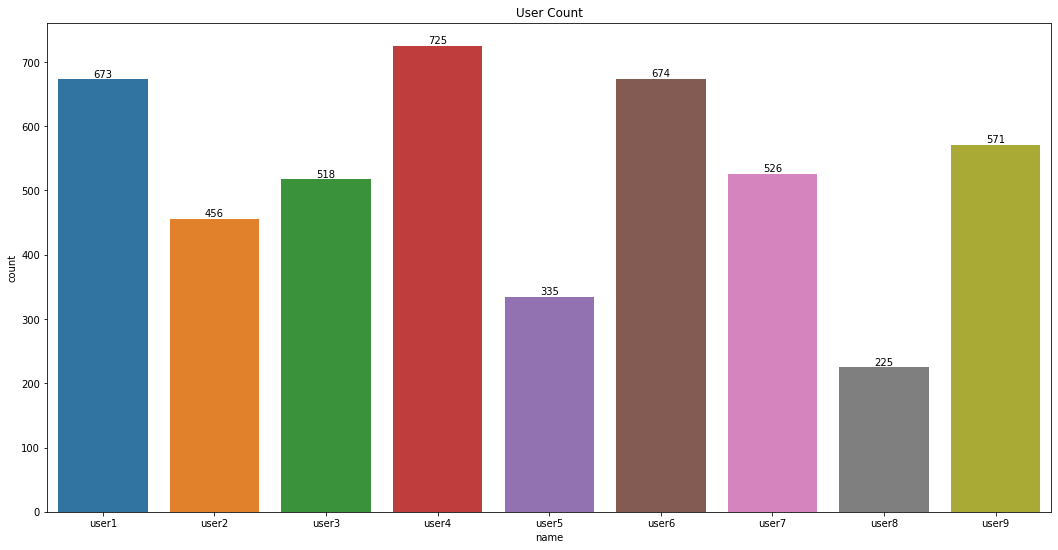

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='name', data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("User Count")
plt.show()
plt.clf()

In [14]:
print('The earliest start time is:')
print(internet_usage.start_time.min())
print('The latest start time is:')
print(internet_usage.start_time.max())

The earliest start time is:
2022-05-09 22:52:41
The latest start time is:
2022-11-05 18:41:14


In [15]:
print('The minimum usage time is:')
print(internet_usage.usage_time.min())
print('The maximum usage time is:')
print(internet_usage.usage_time.max())
print('The average usage time is:')
print(internet_usage.usage_time.mean())

The minimum usage time is:
2022-12-08 00:00:01
The maximum usage time is:
2022-12-08 22:00:07
The average usage time is:
2022-12-08 02:10:05.038486016


In [16]:
print('The minimum usage time per user:')
usage_time_minimum = internet_usage.groupby('name').usage_time.min()
usage_time_minimum

The minimum usage time per user:


name
user1   2022-12-08 00:00:18
user2   2022-12-08 00:00:08
user3   2022-12-08 00:00:01
user4   2022-12-08 00:00:45
user5   2022-12-08 00:01:07
user6   2022-12-08 00:00:18
user7   2022-12-08 00:00:20
user8   2022-12-08 00:00:20
user9   2022-12-08 00:00:09
Name: usage_time, dtype: datetime64[ns]

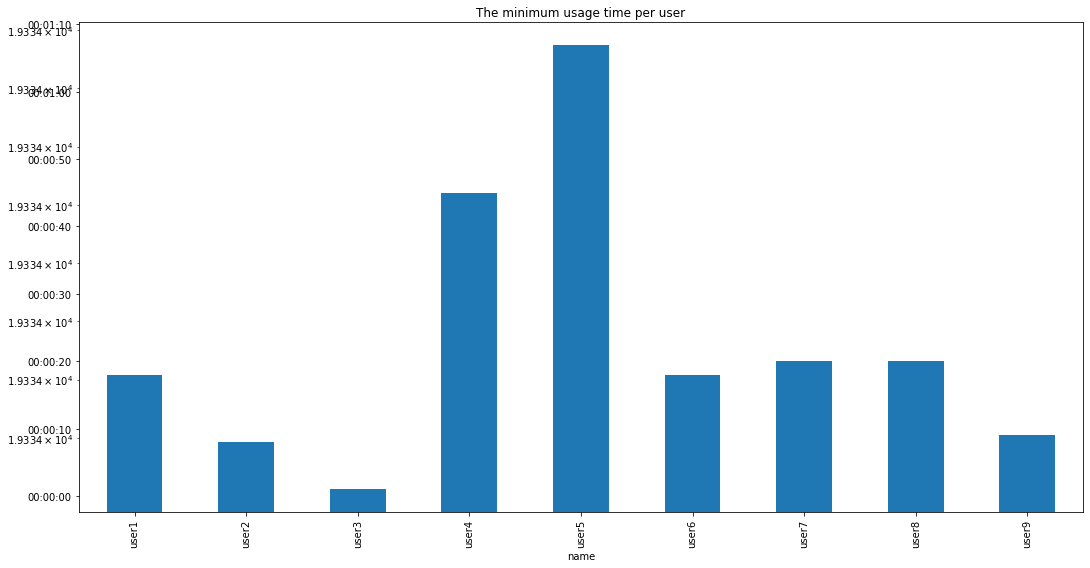

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(18, 9))
usage_time_minimum.plot(kind='bar', logy=True)
plt.title("The minimum usage time per user")
plt.show()
plt.clf()

In [18]:
print('The maximum usage time per user:')
usage_time_maximum = internet_usage.groupby('name').usage_time.max()
usage_time_maximum

The maximum usage time per user:


name
user1   2022-12-08 19:35:11
user2   2022-12-08 20:39:52
user3   2022-12-08 17:01:28
user4   2022-12-08 18:11:43
user5   2022-12-08 06:36:11
user6   2022-12-08 19:35:11
user7   2022-12-08 22:00:07
user8   2022-12-08 17:24:26
user9   2022-12-08 19:26:09
Name: usage_time, dtype: datetime64[ns]

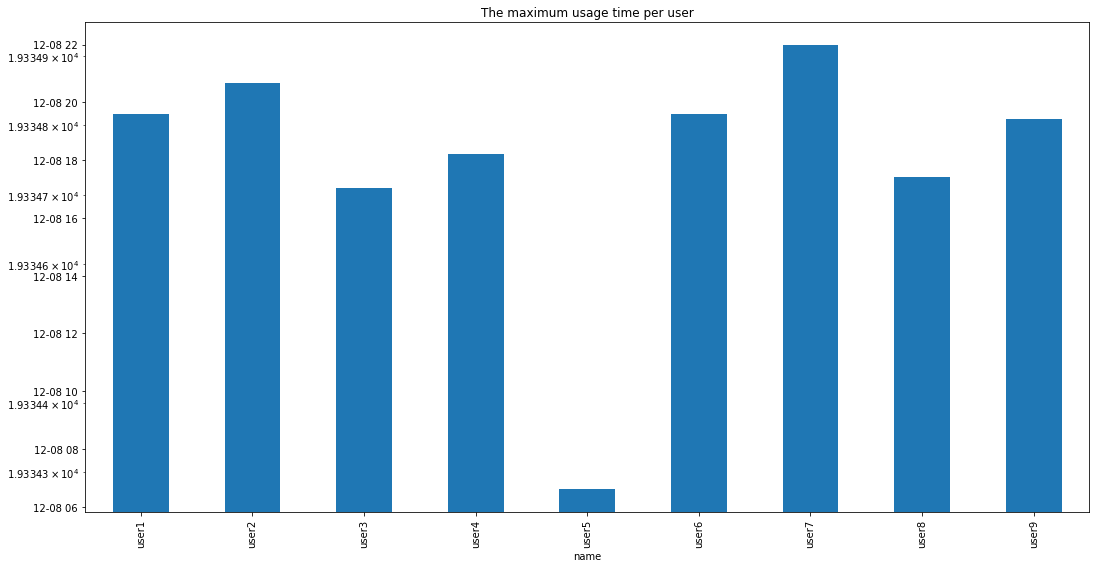

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(18, 9))
usage_time_maximum.plot(kind='bar', logy=True)
plt.title("The maximum usage time per user")
plt.show()
plt.clf()

In [20]:
print('The average usage time per user:')
usage_time_average = internet_usage.groupby('name').usage_time.mean()
usage_time_average

The average usage time per user:


name
user1   2022-12-08 01:42:47.665676032
user2   2022-12-08 01:42:53.866227968
user3   2022-12-08 02:19:42.019305216
user4   2022-12-08 02:38:01.766896384
user5   2022-12-08 01:20:11.701492736
user6   2022-12-08 01:42:49.998516224
user7   2022-12-08 02:17:45.053231872
user8   2022-12-08 04:03:14.555555584
user9   2022-12-08 02:29:32.180385280
Name: usage_time, dtype: datetime64[ns]

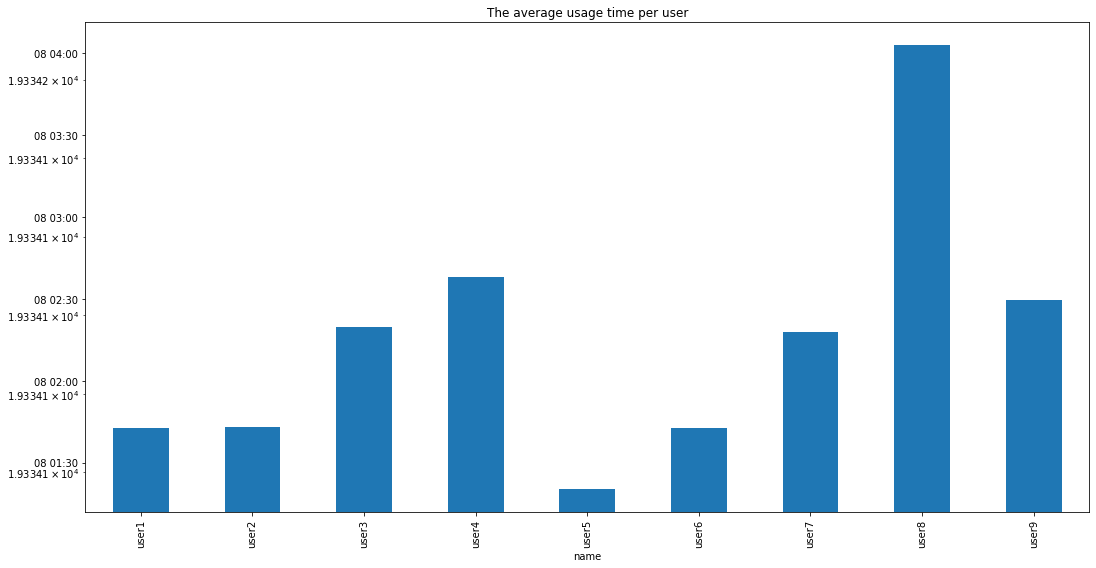

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(18, 9))
usage_time_average.plot(kind='bar', logy=True)
plt.title("The average usage time per user")
plt.show()
plt.clf()

In [22]:
internet_usage.ip.value_counts()

10.55.0.89      80
10.55.14.148    64
10.55.15.221    55
10.55.1.50      48
10.55.10.46     44
                ..
10.55.15.44      1
10.55.15.237     1
10.55.14.166     1
10.55.3.200      1
10.55.4.159      1
Name: ip, Length: 1299, dtype: int64

In [23]:
internet_usage.device.value_counts()

device1206    194
device835     137
device11      137
device1212    132
device312     113
             ... 
device582       1
device583       1
device584       1
device585       1
device613       1
Name: device, Length: 1224, dtype: int64

In [24]:
print('The minimum upload is: ' + str(internet_usage.upload.min()) + 'Kb')
print('The maximum upload is: ' + str(internet_usage.upload.max()) + 'Kb')
print('The average upload is: ' + str(round(internet_usage.upload.mean(), 2)) + 'Kb')

The minimum upload is: 2.0Kb
The maximum upload is: 2841640.0Kb
The average upload is: 33787.02Kb


In [25]:
print('The minimum upload per user:')
internet_usage.groupby('name').upload.min()

The minimum upload per user:


name
user1     19.0
user2     23.0
user3     36.0
user4     56.0
user5    382.0
user6     19.0
user7      2.0
user8      4.0
user9     41.0
Name: upload, dtype: float64

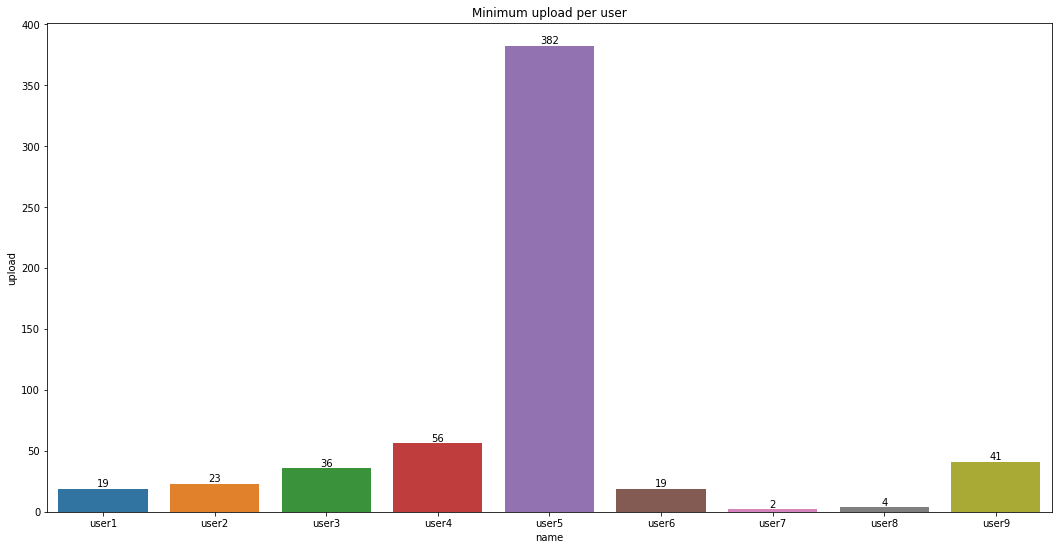

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum upload per user")
plt.show()
plt.clf()

In [27]:
print('The maximum upload per user:')
internet_usage.groupby('name').upload.max()

The maximum upload per user:


name
user1     638566.0
user2     379955.0
user3    1625292.0
user4     754462.0
user5    2841640.0
user6     638566.0
user7     653731.0
user8     709058.0
user9    1352663.0
Name: upload, dtype: float64

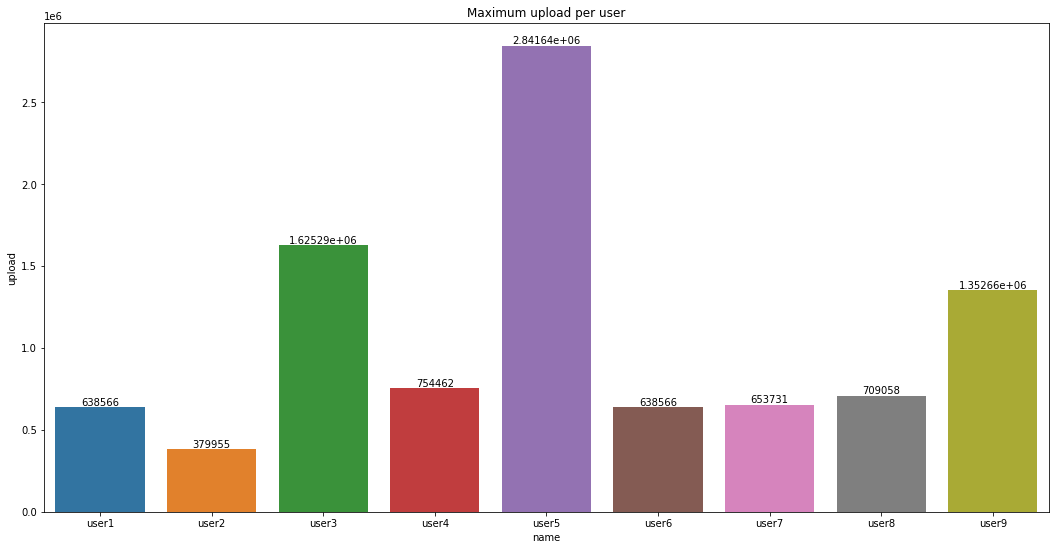

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum upload per user")
plt.show()
plt.clf()

In [29]:
print('The average upload per user:')
round(internet_usage.groupby('name').upload.mean(), 2)

The average upload per user:


name
user1    27291.34
user2    29188.79
user3    29594.88
user4    33783.74
user5    64500.35
user6    27700.73
user7    23075.54
user8    59190.12
user9    37944.66
Name: upload, dtype: float64

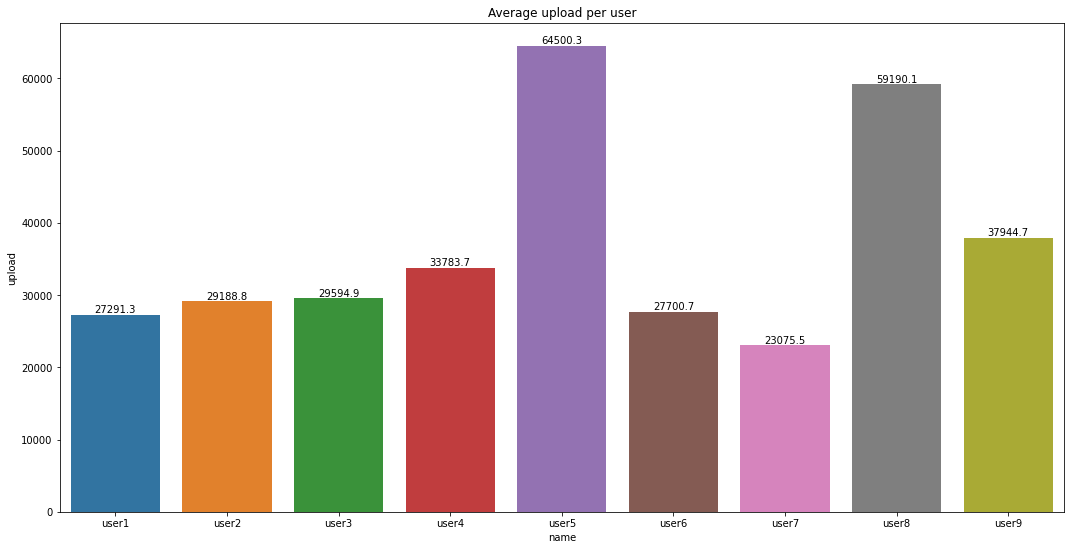

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average upload per user")
plt.show()
plt.clf()

In [31]:
print('The minimum download is: ' + str(internet_usage.download.min()) + 'Kb')
print('The maximum download is: ' + str(internet_usage.download.max()) + 'Kb')
print('The average download is: ' + str(round(internet_usage.download.mean(), 2)) + 'Kb')

The minimum download is: 9.0Kb
The maximum download is: 27902607.0Kb
The average download is: 396664.52Kb


In [32]:
print('The minimum download per user:')
internet_usage.groupby('name').download.min()

The minimum download per user:


name
user1     50.0
user2     49.0
user3     60.0
user4     12.0
user5    461.0
user6     50.0
user7      9.0
user8     13.0
user9     61.0
Name: download, dtype: float64

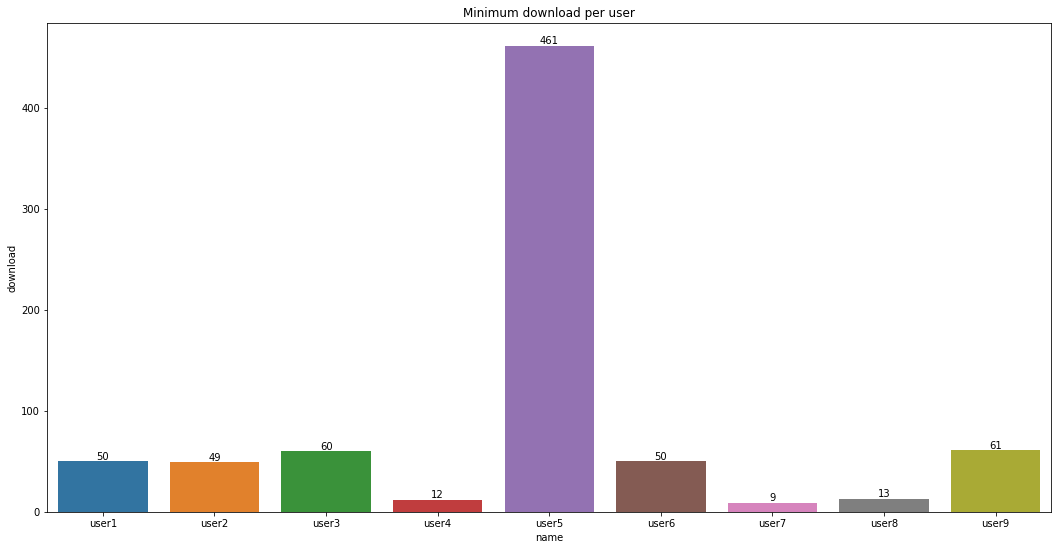

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum download per user")
plt.show()
plt.clf()

In [34]:
print('The maximum download per user:')
internet_usage.groupby('name').download.max()

The maximum download per user:


name
user1    23760732.0
user2    21831352.0
user3     3145728.0
user4     8325693.0
user5     5033164.0
user6    23760732.0
user7    27902607.0
user8     2747269.0
user9     6008340.0
Name: download, dtype: float64

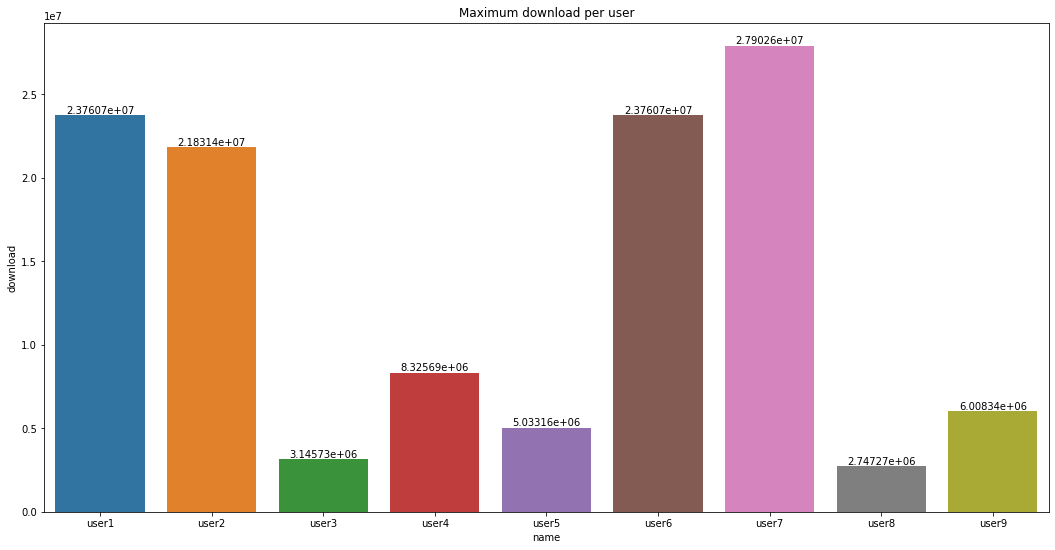

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum download per user")
plt.show()
plt.clf()

In [36]:
print('The average download per user:')
round(internet_usage.groupby('name').download.mean(), 2)

The average download per user:


name
user1    270725.96
user2    573798.02
user3    342230.37
user4    408580.26
user5    357278.08
user6    270545.18
user7    453828.61
user8    341417.12
user9    578981.51
Name: download, dtype: float64

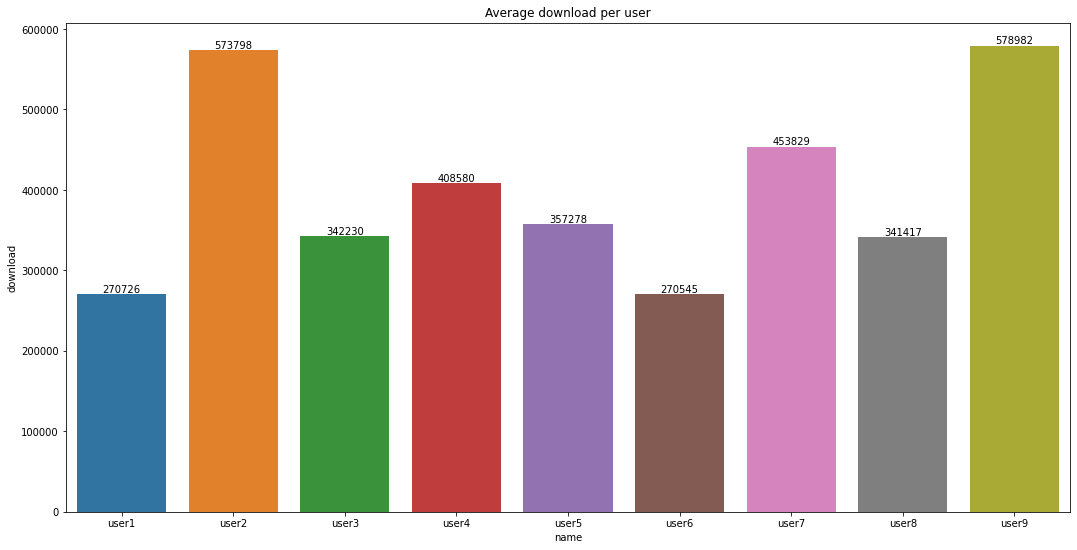

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average download per user")
plt.show()
plt.clf()

In [38]:
print('The minimum total transfer is: ' + str(internet_usage.total_transfer.min()) + 'Kb')
print('The maximum total transfer is: ' + str(internet_usage.total_transfer.max()) + 'Kb')
print('The average total transfer is: ' + str(round(internet_usage.total_transfer.mean(), 2)) + 'Kb')

The minimum total transfer is: 1.12Kb
The maximum total transfer is: 28552724.48Kb
The average total transfer is: 430437.21Kb


In [39]:
print('The minimum total transfer per user:')
internet_usage.groupby('name').total_transfer.min()

The minimum total transfer per user:


name
user1     75.34
user2     73.13
user3      1.12
user4     13.45
user5    924.40
user6     75.34
user7     15.25
user8     18.08
user9    102.64
Name: total_transfer, dtype: float64

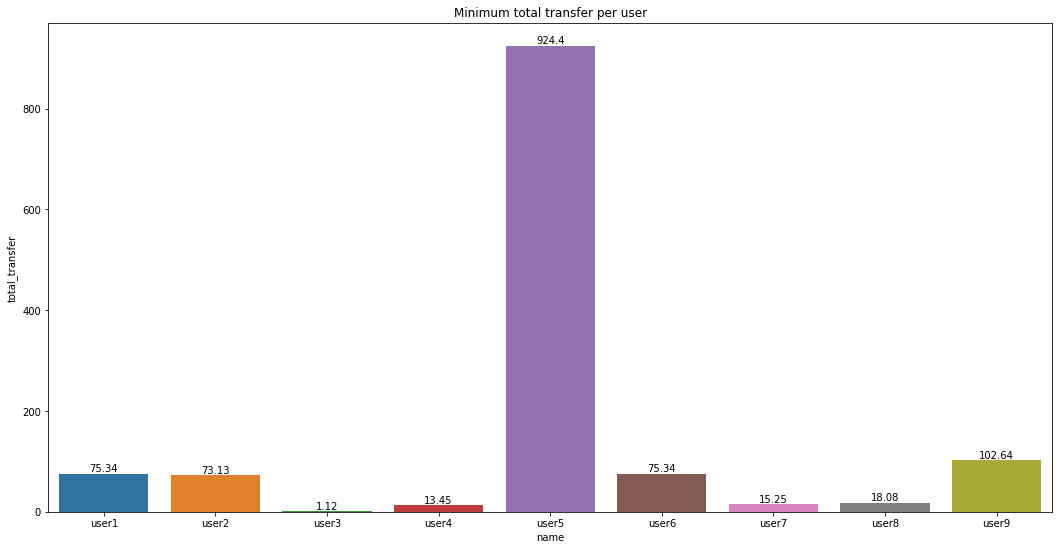

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum total transfer per user")
plt.show()
plt.clf()

In [41]:
print('The maximum total transfer per user:')
internet_usage.groupby('name').total_transfer.max()

The maximum total transfer per user:


name
user1    24389877.76
user2    22051553.28
user3     3282042.88
user4     8524922.88
user5     5158993.92
user6    24389877.76
user7    28552724.48
user8     3166699.52
user9     6155141.12
Name: total_transfer, dtype: float64

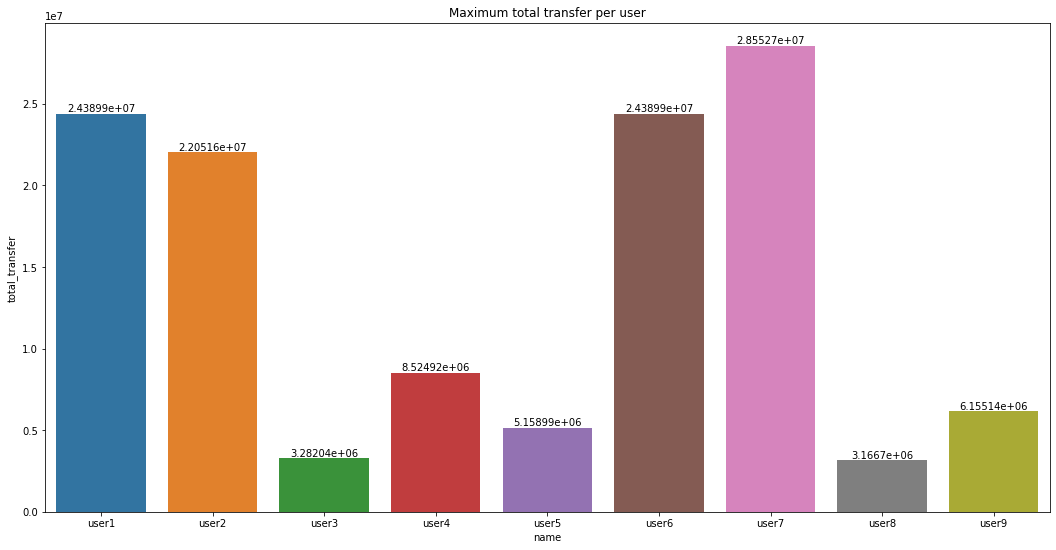

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum total transfer per user")
plt.show()
plt.clf()

In [43]:
print('The average total transfer per user:')
round(internet_usage.groupby('name').total_transfer.mean(), 2)

The average total transfer per user:


name
user1    297971.21
user2    602904.19
user3    371826.53
user4    442413.51
user5    421772.04
user6    298199.88
user7    476923.04
user8    400682.28
user9    616875.57
Name: total_transfer, dtype: float64

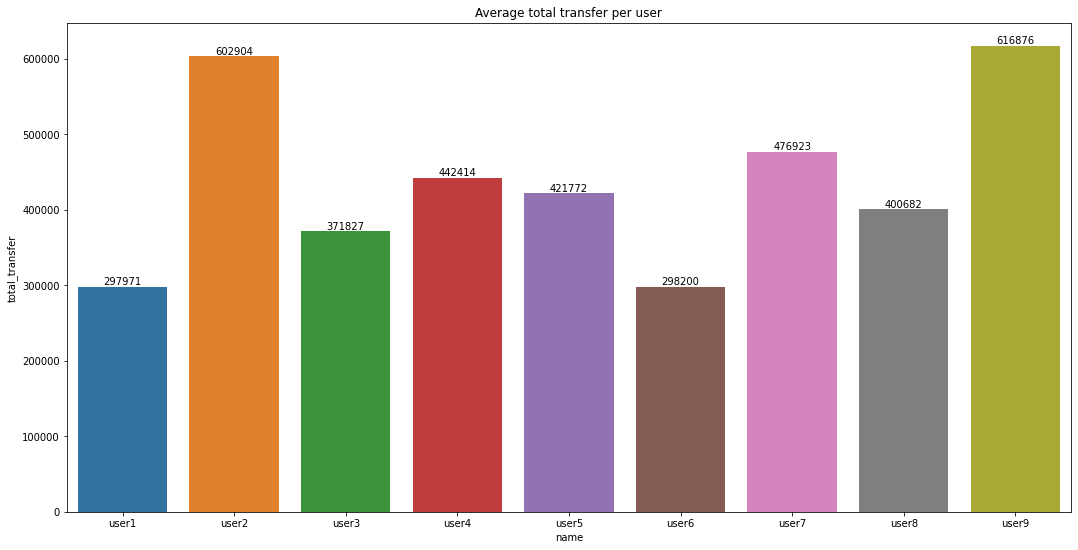

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average total transfer per user")
plt.show()
plt.clf()

In [45]:
internet_usage.seession_break_reason.value_counts()

Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
User-Request      65
NAS-Reboot         2
Name: seession_break_reason, dtype: int64

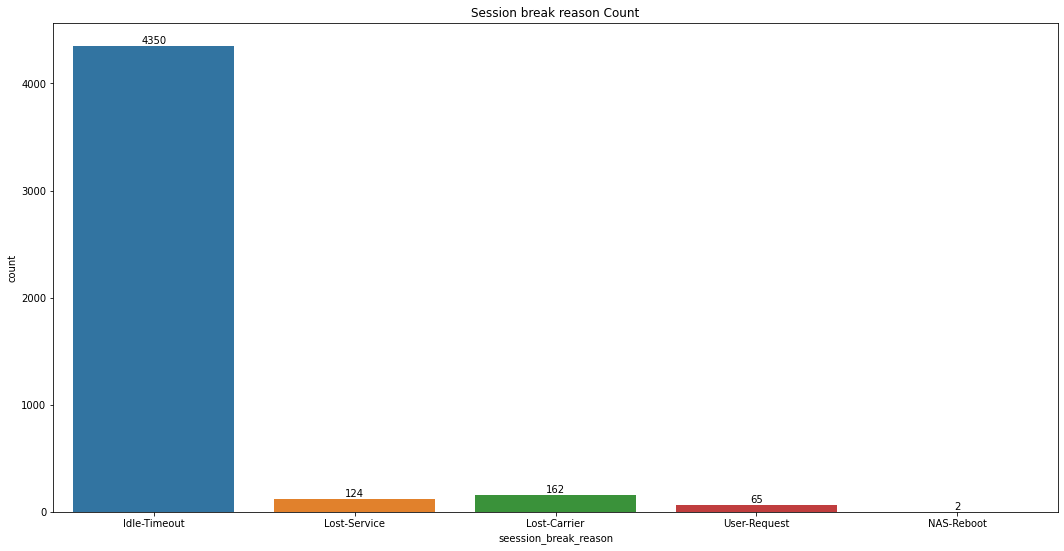

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='seession_break_reason' , data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count")
plt.show()
plt.clf()

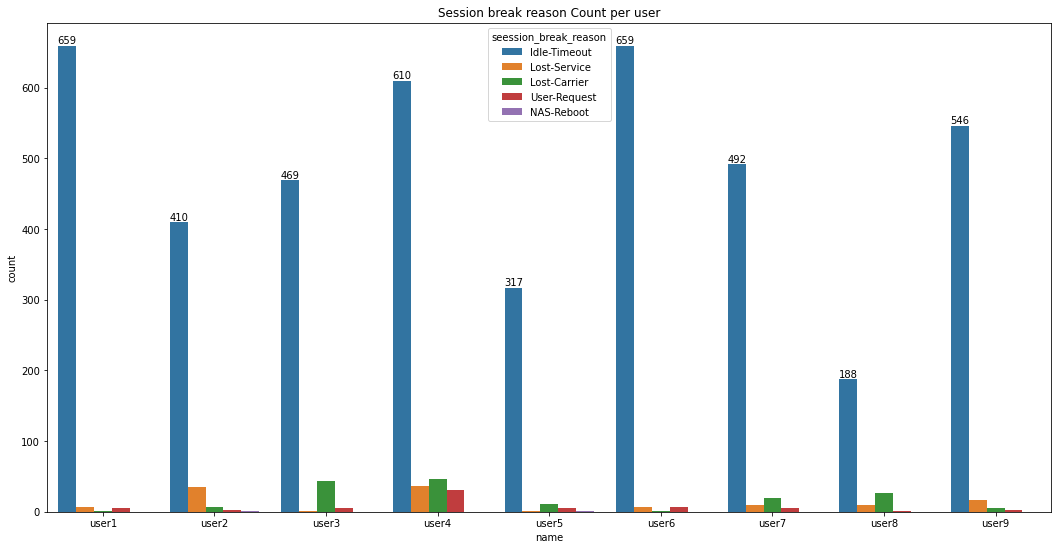

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='name', hue = 'seession_break_reason' , data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count per user")
plt.show()
plt.clf()

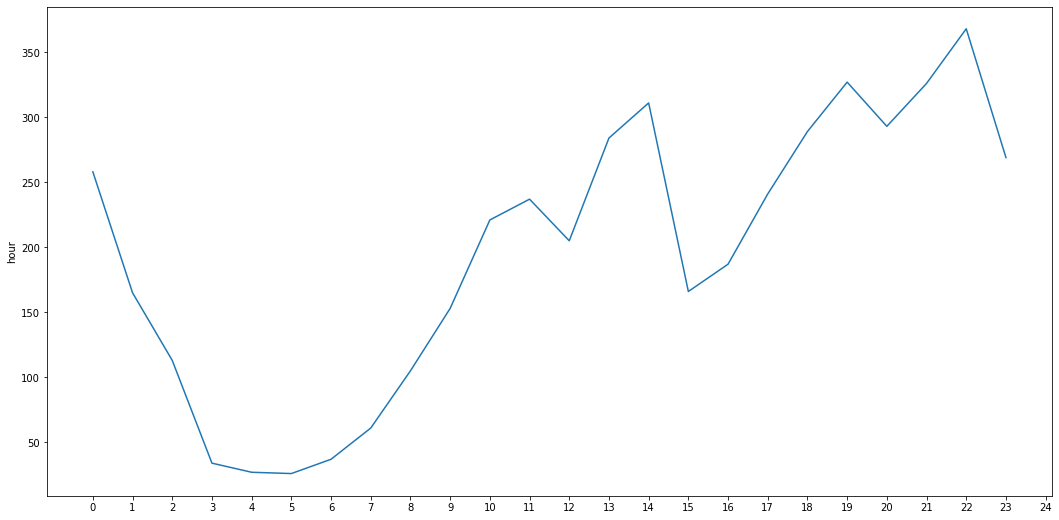

<Figure size 432x288 with 0 Axes>

In [48]:
internet_usage['hour'] = pd.to_datetime(internet_usage['start_time']).dt.hour
frequent_activity_time_of_day = internet_usage['hour'].value_counts().sort_index()
plt.figure(figsize=(18, 9))
sns.lineplot(data=frequent_activity_time_of_day)
plt.xticks(np.linspace(start=0, stop=24, num=25))
plt.show()
plt.clf()

In [49]:
base_ip = '48:E7:DA:58:22:E9'
ip_count = 0
for i in range(1, internet_usage.shape[0]):
    if internet_usage.iloc[i]['ip'] != base_ip:
        ip_count +=1
        base_ip = internet_usage.iloc[i]['ip']

print('The IP Adress changed ' + str(ip_count) + ' times') 

The IP Adress changed 2303 times


In [50]:
base_device = 'device1'
device_count = 0
for i in range(1, internet_usage.shape[0]):
    if internet_usage.iloc[i]['device'] != base_device:
        device_count +=1
        base_device = internet_usage.iloc[i]['device']

print('The device changed ' + str(device_count) + ' times') 

The device changed 1223 times


In [51]:
internet_usage.reset_index(inplace=True)

internet_usage['day'] = internet_usage['start_time'].dt.day
internet_usage['month'] = internet_usage['start_time'].dt.month

hourly_average = internet_usage.groupby('hour').total_transfer.mean()
print('The Average usage per hour is:\n ' +  str(round(hourly_average, 2)))

The Average usage per hour is:
 hour
0     464530.44
1     530880.86
2     431576.11
3     345303.34
4     359809.44
5     275960.91
6     468959.59
7     292886.83
8     366681.92
9     377480.64
10    393259.12
11    309492.45
12    310137.98
13    335270.58
14    472403.71
15    517005.11
16    403919.40
17    525423.69
18    666590.76
19    389841.79
20    355862.80
21    474038.34
22    449600.50
23    407785.08
Name: total_transfer, dtype: float64


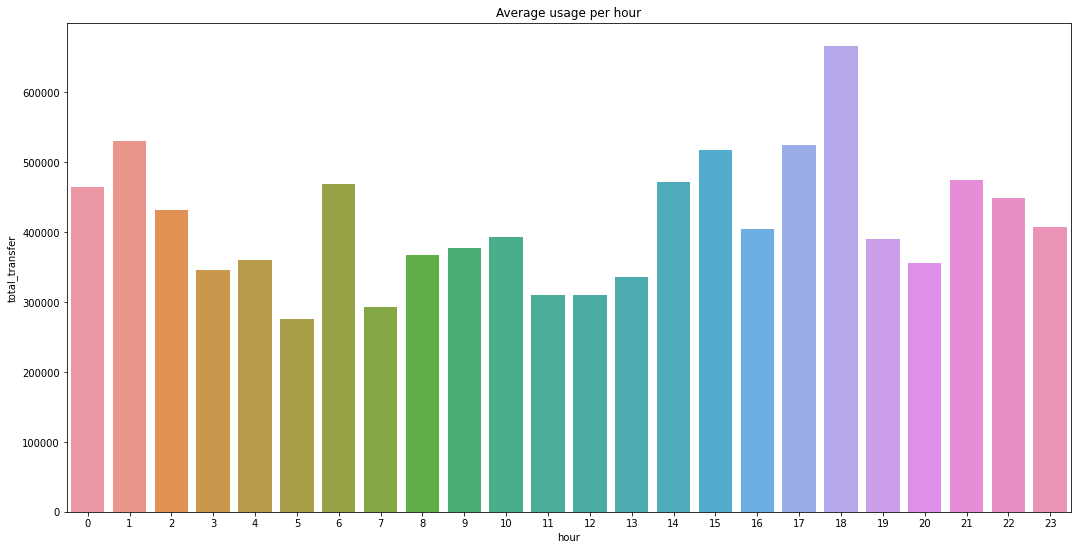

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(18, 9))
sns.barplot(x='hour', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per hour")
plt.show()
plt.clf()

In [53]:
daily_average = internet_usage.groupby('day').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(daily_average, 2)))

The Average usage per day is:
 day
1     396705.04
2     494496.48
3     445865.63
4     676332.03
5     652195.66
6     396261.75
7     402259.89
8     301859.57
9     393521.97
10    350665.02
11    729857.65
12    346695.95
13    501906.70
14    352701.10
15    521520.51
16    426719.39
17    475795.71
18    337490.93
19    301941.32
20    365130.12
21    462211.69
22    486595.37
23    383153.93
24    320598.94
25    443689.47
26    463432.02
27    324318.12
28    494576.34
29    363645.61
30    361418.88
31    369118.01
Name: total_transfer, dtype: float64


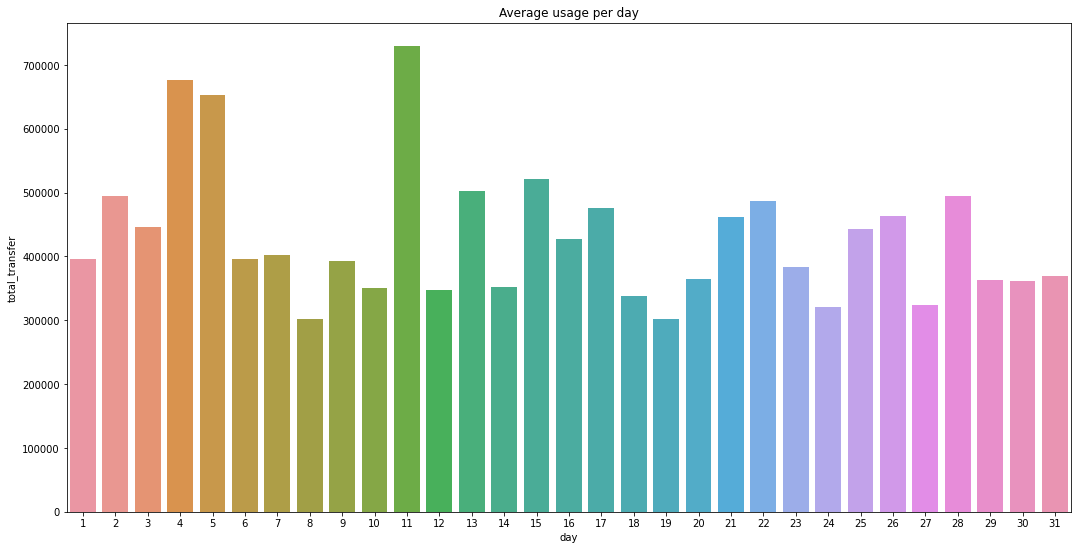

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(18, 9))
sns.barplot(x='day', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per day")
plt.show()
plt.clf()

In [55]:
monthly_average = internet_usage.groupby('month').total_transfer.mean()
print('The Average usage per month is:\n ' +  str(round(monthly_average, 2)))

The Average usage per month is:
 month
5     311177.16
6     338418.08
7     418583.99
8     479042.44
9     482955.52
10    549467.63
11    399804.11
Name: total_transfer, dtype: float64


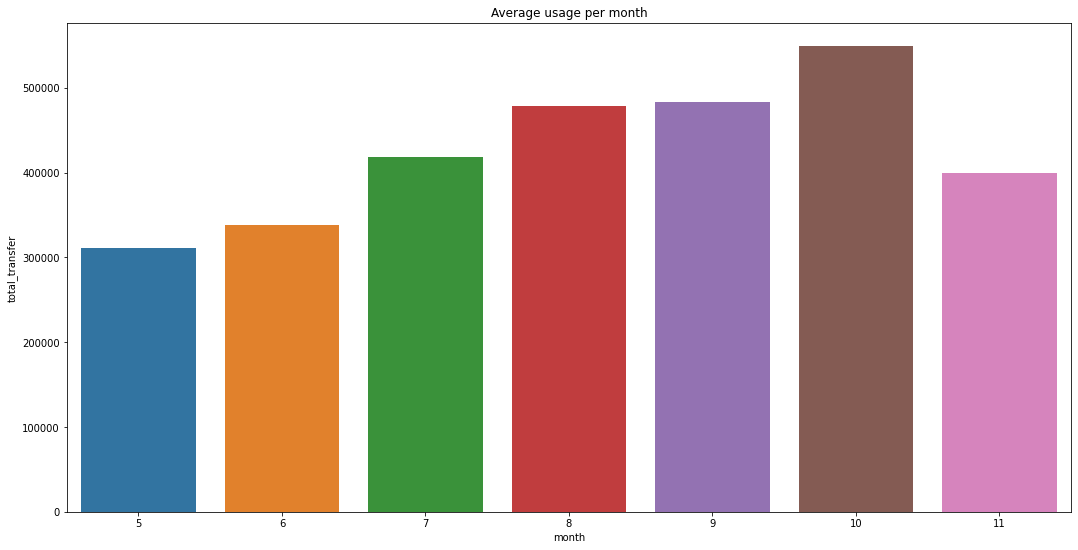

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(18, 9))
sns.barplot(x='month', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per month")
plt.show()
plt.clf()